In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Softmax
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_excel('cancer_classification.xlsx')

In [ ]:
df.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
45,18.65,17.6,123.7,1076.0,0.1099,0.1686,0.1974,0.1009,0.1907,0.06049,...,21.32,150.6,1567.0,0.1679,0.509,0.7345,0.2378,0.3799,0.09185,0


In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

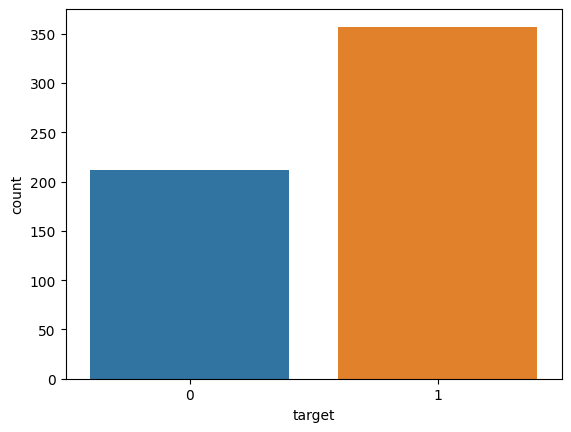

In [ ]:
sns.countplot(data =df,x = 'target')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
ann =Sequential()

ann.add(Dense(units=30,activation = 'relu')) #input
ann.add(Dense(units= 15,activation = 'relu')) # hidden layer
ann.add(Dense(units = 1,activation='sigmoid')) # output

ann.compile(optimizer="adam",loss="binary_crossentropy")

ann.fit(xtrain,ytrain,epochs = 600,validation_data=(xtest,ytest))

Epoch 1/600
15/15 [==============================] - 1s 19ms/step - loss: 0.7323 - val_loss: 0.5581
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4359 - val_loss: 0.4223
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3133 - val_loss: 0.3496
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2503 - val_loss: 0.3037
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2087 - val_loss: 0.2700
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1794 - val_loss: 0.2384
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1575 - val_loss: 0.2160
Epoch 8/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1403 - val_loss: 0.1934
Epoch 9/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1256 - val_loss: 0.1732
Epoch 10/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1141 - val_loss: 0.1587
Epoch 11

<Axes: >

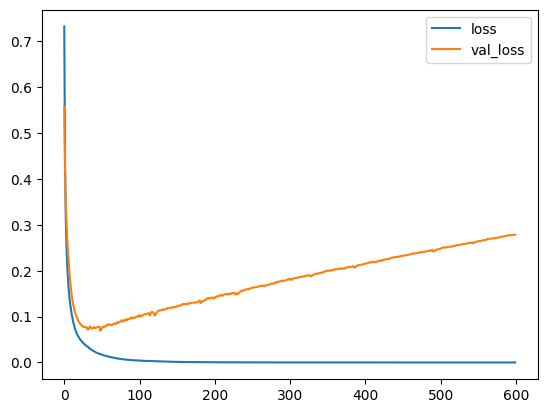

In [ ]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.plot()

In [ ]:
#Early Stoping
ann =Sequential()

ann.add(Dense(units=30,activation = 'relu')) #input
ann.add(Dense(units= 15,activation = 'relu')) # hidden layer
ann.add(Dense(units = 1,activation='sigmoid')) # output

ann.compile(optimizer="adam",loss="binary_crossentropy")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor= "val_loss", mode="min", verbose = 1, patience = 25)

In [ ]:
ann.fit(xtrain,ytrain,epochs = 600,validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 1s 15ms/step - loss: 0.9415 - val_loss: 0.7809
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.7131 - val_loss: 0.6448
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5854 - val_loss: 0.5451
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4721 - val_loss: 0.4437
Epoch 5/600
15/15 [==============================] - 0s 6ms/step - loss: 0.3645 - val_loss: 0.3492
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2778 - val_loss: 0.2775
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2180 - val_loss: 0.2284
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1775 - val_loss: 0.1947
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1497 - val_loss: 0.1692
Epoch 10/600
15/15 [==============================] - 0s 6ms/step - loss: 0.1290 - val_loss: 0.1492
Epoch 11

<Axes: >

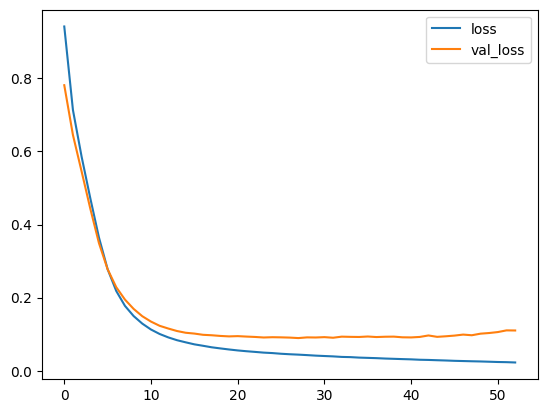

In [ ]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.plot()

In [ ]:
# Dropout
ann =Sequential()

ann.add(Dense(units=30,activation = 'relu')) #input
ann.add(Dropout(rate =0.5))
ann.add(Dense(units= 15,activation = 'relu')) # hidden layer
ann.add(Dropout(rate =0.5))
ann.add(Dense(units = 1,activation='sigmoid')) # output

ann.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
early_stop = EarlyStopping(monitor= "val_loss", mode="min", verbose = 1, patience = 25)

In [ ]:
ann.fit(xtrain,ytrain,epochs = 600,validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 1s 14ms/step - loss: 0.6671 - val_loss: 0.5283
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5811 - val_loss: 0.4560
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4842 - val_loss: 0.4056
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4173 - val_loss: 0.3619
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4156 - val_loss: 0.3265
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3576 - val_loss: 0.2969
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3386 - val_loss: 0.2736
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3325 - val_loss: 0.2533
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2925 - val_loss: 0.2359
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2523 - val_loss: 0.2210
Epoch 11

<Axes: >

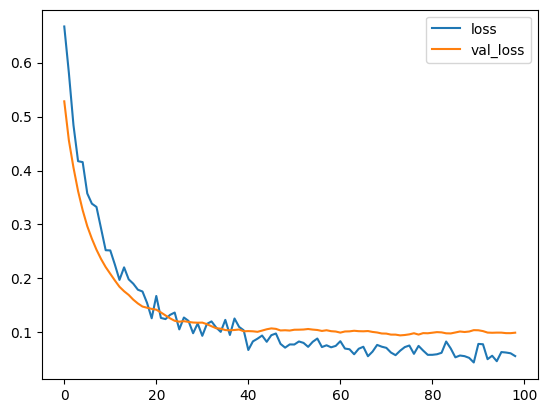

In [ ]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.plot()

In [ ]:
ypred = ann.predict(xtest) # predict

ypred = ypred > 0.5  # set threshold

4/4 [==============================] - 0s 3ms/step


In [ ]:
# Classification Report
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel = 'rbf',random_state = 1)
classifier.fit(xtrain,ytrain)

SVC(random_state=1)

In [ ]:
ypred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[40,  2],
       [ 1, 71]])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

